<a href="https://colab.research.google.com/github/Patchacharp/ML_DADS6003/blob/main/ML_6610422030_As02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.ultimatepython.co/post/python-yahoo-finance

In [41]:
#!pip install pandas
#!pip install numpy
#!pip install requests
#!pip install lxml
#!pip install yfinance

In [42]:
import yfinance as yf
import pandas as pd
import numpy as np

In [ ]:
#Technical Indicators
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xvzf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install TA-Lib

In [44]:
# Technical Indicators
import talib as ta

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

#Data fetching
from pandas_datareader import data as pdr
yf.pdr_override()

# **เลือกหุ้น Super Micro Computer, Inc. (SMCI)**

In [45]:
SMC = yf.Ticker('SMCI')
interval = '1h'
start = '2023-10-1'
end = '2024-2-20'
SMC_df = SMC.history(interval=interval,start=start,end=end)
SMC_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-10-02 09:30:00-04:00,275.000000,286.720001,274.630707,285.375000,1000272,0.0,0.0
2023-10-02 10:30:00-04:00,285.649994,292.000000,284.029999,290.470001,764217,0.0,0.0
2023-10-02 11:30:00-04:00,290.679993,291.959991,288.170013,289.989990,467424,0.0,0.0
2023-10-02 12:30:00-04:00,289.760010,290.499908,286.510010,289.709991,295000,0.0,0.0
2023-10-02 13:30:00-04:00,289.856201,289.880005,286.720001,287.378998,185416,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-16 11:30:00-05:00,899.900024,901.030029,877.909973,893.592712,1965647,0.0,0.0
2024-02-16 12:30:00-05:00,893.019287,898.390015,808.000000,816.559998,4260720,0.0,0.0
2024-02-16 13:30:00-05:00,816.500000,843.000000,812.159973,830.856018,3214383,0.0,0.0


# **RSI**

In [46]:
#ค่า mean ของราคาหุ้นในช่วง 14 วัน
SMC_df['S_14'] = SMC_df['Close'].rolling(window=14).mean()
#Correlation ของราคาปิดในช่วง 14 วัน
SMC_df['Corr'] = SMC_df['Close'].rolling(window=14).corr(SMC_df['S_14'])
#RSI ของหุ้นในช่วง 14 วัน Oversold (RSI<20) Overbought (RSI>80)
SMC_df['RSI'] = ta.RSI(np.array(SMC_df['Close']), timeperiod =14)
SMC_df['Open-Close'] = SMC_df['Open'] - SMC_df['Close'].shift(1)
SMC_df['Open-Open'] = SMC_df['Open'] - SMC_df['Open'].shift(1)
SMC_df = SMC_df.dropna()
X = SMC_df.iloc[:,:9]
X

,Open,High,Low,Close,Volume,Dividends,Stock Splits,S_14,Corr
Datetime,,,,,,,,,
2023-10-05 14:30:00-04:00,284.769897,288.100006,284.279999,287.262512,317123,0.0,0.0,279.280014,-0.194744
2023-10-05 15:30:00-04:00,287.329987,287.929993,286.692810,287.500000,328699,0.0,0.0,280.518164,0.309572
2023-10-06 09:30:00-04:00,284.420013,288.609894,280.609985,287.959991,843639,0.0,0.0,281.708165,0.707719
2023-10-06 10:30:00-04:00,287.924011,291.290009,287.670013,290.019989,433572,0.0,0.0,282.606020,0.834771
2023-10-06 11:30:00-04:00,290.100006,294.399902,290.024994,292.744995,356264,0.0,0.0,283.602805,0.894204
...,...,...,...,...,...,...,...,...,...
2024-02-16 11:30:00-05:00,899.900024,901.030029,877.909973,893.592712,1965647,0.0,0.0,930.481066,0.437638
2024-02-16 12:30:00-05:00,893.019287,898.390015,808.000000,816.559998,4260720,0.0,0.0,928.554352,0.086407
2024-02-16 13:30:00-05:00,816.500000,843.000000,812.159973,830.856018,3214383,0.0,0.0,926.193355,-0.163073


# **Define Target / Dependent Variable**

In [47]:
y = np.where(SMC_df['Close'].shift(-1) > SMC_df['Close'],1,-1)

# **Split the dataset**

In [48]:
split = int(0.8*len(SMC_df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [49]:
model = LogisticRegression()
model = model.fit (X_train,y_train)

In [50]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Open,[-7.927087607845272e-05]
1,High,[-7.914025534966493e-05]
2,Low,[-7.772136406505502e-05]
3,Close,[-7.888374932649443e-05]
4,Volume,[2.0509050254021912e-07]
5,Dividends,[0.0]
6,Stock Splits,[0.0]
7,S_14,[-8.255557322026715e-05]
8,Corr,[-6.94516616261451e-08]


# **Specify the date for prediction**

In [51]:
prediction_date = '2024-2-22'
probability = model.predict_proba(X_test)
print(probability)

[[0.49094594 0.50905406]
 [0.47922225 0.52077775]
 [0.49488681 0.50511319]
 [0.38949199 0.61050801]
 [0.43808807 0.56191193]
 [0.47437845 0.52562155]
 [0.46542694 0.53457306]
 [0.48660248 0.51339752]
 [0.46492623 0.53507377]
 [0.50112388 0.49887612]
 [0.44657552 0.55342448]
 [0.49789748 0.50210252]
 [0.51280965 0.48719035]
 [0.50428037 0.49571963]
 [0.50697607 0.49302393]
 [0.50977577 0.49022423]
 [0.5202697  0.4797303 ]
 [0.47353687 0.52646313]
 [0.49449294 0.50550706]
 [0.51603748 0.48396252]
 [0.52613054 0.47386946]
 [0.52965286 0.47034714]
 [0.51302751 0.48697249]
 [0.52591912 0.47408088]
 [0.39844864 0.60155136]
 [0.48870578 0.51129422]
 [0.50404745 0.49595255]
 [0.51533016 0.48466984]
 [0.50345909 0.49654091]
 [0.48995405 0.51004595]
 [0.49015097 0.50984903]
 [0.18073688 0.81926312]
 [0.4426359  0.5573641 ]
 [0.46004956 0.53995044]
 [0.47045289 0.52954711]
 [0.4791     0.5209    ]
 [0.48315334 0.51684666]
 [0.50320273 0.49679727]
 [0.32802157 0.67197843]
 [0.44987422 0.55012578]


# **Predict Class Labels**

In [52]:
predicted = model.predict(X_test)
print(predicted)

[ 1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1
  1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1 -1  1  1  1
  1  1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1 -1 -1 -1  1 -1  1  1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1
  1 -1  1  1 -1  1  1  1 -1 -1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1]


# **Confusion Matrix**

In [53]:
print(metrics.confusion_matrix(y_test, predicted))

[[17 36]
 [26 50]]


# **Classification Report**

In [54]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.40      0.32      0.35        53
           1       0.58      0.66      0.62        76

    accuracy                           0.52       129
   macro avg       0.49      0.49      0.49       129
weighted avg       0.50      0.52      0.51       129



# **Model Accuracy**

In [55]:
print(model.score(X_test,y_test))

0.5193798449612403


# **Show result**

<ipython-input-56-de3781722187>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SMC_df['Predicted_Signal'] = model.predict(X)
<ipython-input-56-de3781722187>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SMC_df['SMC_returns'] = np.log(SMC_df['Close']/SMC_df['Close'].shift(1))
<ipython-input-56-de3781722187>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

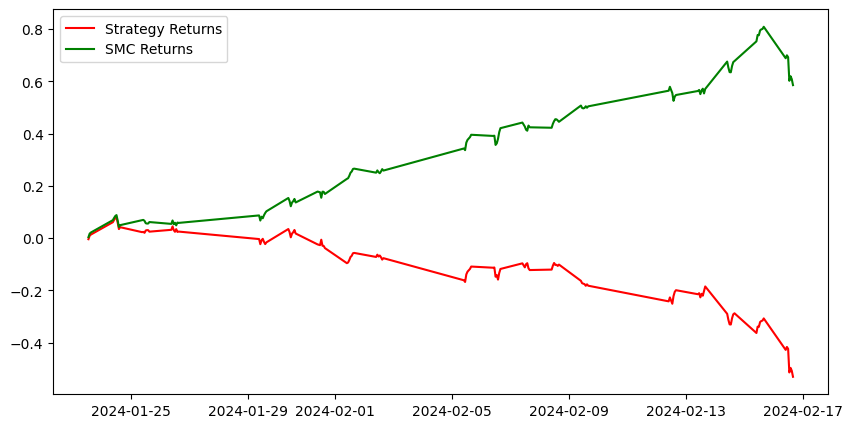

In [56]:
SMC_df['Predicted_Signal'] = model.predict(X)
SMC_df['SMC_returns'] = np.log(SMC_df['Close']/SMC_df['Close'].shift(1))
Cumulative_SMC_returns = np.cumsum(SMC_df[split:]['SMC_returns'])


SMC_df['Strategy_returns'] = SMC_df['SMC_returns']* SMC_df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(SMC_df[split:]['Strategy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_Strategy_returns, color='r', label = 'Strategy Returns')
plt.plot(Cumulative_SMC_returns, color='g', label = 'SMC Returns')
plt.legend()
plt.show()

# **Cross-Validation**

In [57]:
cross_val = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())

[0.52307692 0.50769231 0.515625   0.515625   0.515625   0.515625
 0.515625   0.5        0.5        0.515625  ]
0.5124519230769231


# **Create Trading Strategy Using The Model**

<ipython-input-58-e8d367e70df8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SMC_df['Predicted_Signal'] = model.predict(X)
<ipython-input-58-e8d367e70df8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SMC_df['SMC_returns'] = np.log(SMC_df['Close']/SMC_df['Close'].shift(1))
<ipython-input-58-e8d367e70df8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

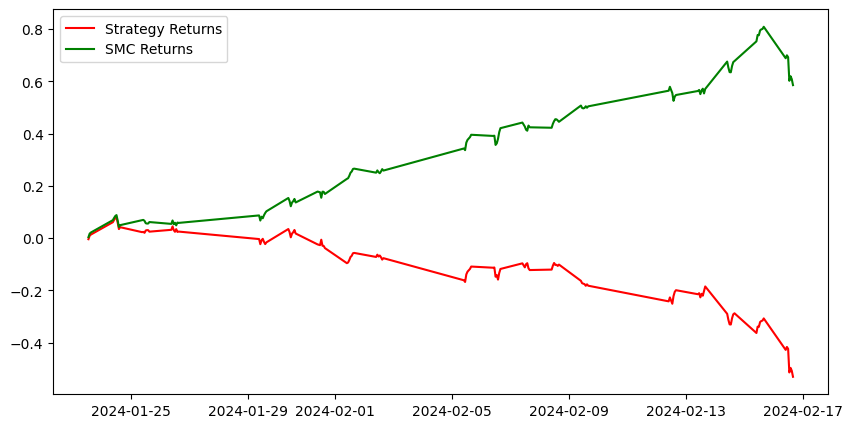

In [58]:
SMC_df['Predicted_Signal'] = model.predict(X)
SMC_df['SMC_returns'] = np.log(SMC_df['Close']/SMC_df['Close'].shift(1))
Cumulative_SMC_returns = np.cumsum(SMC_df[split:]['SMC_returns'])

SMC_df['Strategy_returns'] = SMC_df['SMC_returns']* SMC_df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(SMC_df[split:]['Strategy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_Strategy_returns, color='r', label = 'Strategy Returns')
plt.plot(Cumulative_SMC_returns, color='g', label = 'SMC Returns')
plt.legend()
plt.show()

# **เปรียบเทียบกับหุ้นตลาดหลักทรัพย์ NASDAQ**

In [59]:
from posixpath import splitdrive
NASDAQ = yf.Ticker('^IXIC')
interval = '1h'
start = '2023-10-1'
end = '2024-2-20'
NASDAQ_df = NASDAQ.history(interval=interval,start=start,end=end)
NASDAQ_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-10-02 09:30:00-04:00,13214.326172,13322.745117,13205.239258,13276.864258,0,0.0,0.0
2023-10-02 10:30:00-04:00,13274.300781,13362.470703,13256.049805,13359.564453,518679000,0.0,0.0
2023-10-02 11:30:00-04:00,13362.801758,13363.055664,13238.122070,13257.245117,428558000,0.0,0.0
2023-10-02 12:30:00-04:00,13256.502930,13264.653320,13212.901367,13249.817383,355706000,0.0,0.0
2023-10-02 13:30:00-04:00,13251.360352,13283.429688,13225.039062,13225.985352,374531000,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-16 11:30:00-05:00,15881.376953,15898.850586,15866.446289,15885.657227,492487000,0.0,0.0
2024-02-16 12:30:00-05:00,15885.925781,15889.690430,15824.967773,15847.976562,418445000,0.0,0.0
2024-02-16 13:30:00-05:00,15847.605469,15904.398438,15843.815430,15896.328125,375525000,0.0,0.0


In [60]:
#ค่า mean ของราคาหุ้นในช่วง 14 วัน
NASDAQ_df['S_14'] = NASDAQ_df['Close'].rolling(window=14).mean()
#Correlation ของราคาปิดในช่วง 14 วัน
NASDAQ_df['Corr'] = NASDAQ_df['Close'].rolling(window=14).corr(NASDAQ_df['S_14'])
#RSI ของหุ้นในช่วง 14 วัน
NASDAQ_df['RSI'] = ta.RSI(np.array(NASDAQ_df['Close']), timeperiod =14)
NASDAQ_df['Open-Close'] = NASDAQ_df['Open'] - NASDAQ_df['Close'].shift(1)
NASDAQ_df['Open-Open'] = NASDAQ_df['Open'] - NASDAQ_df['Open'].shift(1)
NASDAQ_df = NASDAQ_df.dropna()
X1 = NASDAQ_df.iloc[:,:9]
X1


,Open,High,Low,Close,Volume,Dividends,Stock Splits,S_14,Corr
Datetime,,,,,,,,,
2023-10-05 14:30:00-04:00,13214.011719,13251.032227,13213.047852,13233.050781,361063000,0.0,0.0,13166.480887,-0.361794
2023-10-05 15:30:00-04:00,13233.488281,13238.922852,13213.489258,13220.920898,460771000,0.0,0.0,13177.832450,0.123560
2023-10-06 09:30:00-04:00,13127.392578,13200.755859,13099.424805,13200.175781,0,0.0,0.0,13186.771973,0.403720
2023-10-06 10:30:00-04:00,13203.399414,13290.187500,13203.399414,13273.166016,472131959,0.0,0.0,13195.070731,0.597603
2023-10-06 11:30:00-04:00,13274.975586,13394.722656,13274.975586,13372.309570,437804000,0.0,0.0,13207.867815,0.741660
...,...,...,...,...,...,...,...,...,...
2024-02-16 11:30:00-05:00,15881.376953,15898.850586,15866.446289,15885.657227,492487000,0.0,0.0,15845.277414,0.468519
2024-02-16 12:30:00-05:00,15885.925781,15889.690430,15824.967773,15847.976562,418445000,0.0,0.0,15852.639509,0.421155
2024-02-16 13:30:00-05:00,15847.605469,15904.398438,15843.815430,15896.328125,375525000,0.0,0.0,15861.571777,0.422634


In [61]:
y1 = np.where(NASDAQ_df['Close'].shift(-1) > NASDAQ_df['Close'],1,-1)

split = int(0.8*len(NASDAQ_df))
X1_train, X1_test, y1_train, y1_test = X1[:split], X1[split:], y1[:split], y1[split:]

model = LogisticRegression()
model = model.fit (X1_train,y1_train)

pd.DataFrame(zip(X1.columns, np.transpose(model.coef_)))

,0,1
0,Open,[1.9904561278769905e-14]
1,High,[1.9961827629948975e-14]
2,Low,[1.9895394952233395e-14]
3,Close,[1.9950241206755966e-14]
4,Volume,[6.326886676130717e-10]
5,Dividends,[0.0]
6,Stock Splits,[0.0]
7,S_14,[1.9737720882418376e-14]
8,Corr,[7.249131113155759e-19]


In [62]:
prediction_date = '2024-02-22'
probability = model.predict_proba(X1_test)
print(probability)


[[0.43233236 0.56766764]
 [0.4217229  0.5782771 ]
 [0.4241775  0.5758225 ]
 [0.5        0.5       ]
 [0.40366946 0.59633054]
 [0.42672375 0.57327625]
 [0.42967261 0.57032739]
 [0.43678727 0.56321273]
 [0.43052695 0.56947305]
 [0.43081301 0.56918699]
 [0.5        0.5       ]
 [0.4026834  0.5973166 ]
 [0.42079432 0.57920568]
 [0.42972393 0.57027607]
 [0.43786727 0.56213273]
 [0.43593468 0.56406532]
 [0.43310067 0.56689933]
 [0.34892723 0.65107277]
 [0.41522867 0.58477133]
 [0.43410506 0.56589494]
 [0.44217917 0.55782083]
 [0.44938144 0.55061856]
 [0.43988077 0.56011923]
 [0.43409651 0.56590349]
 [0.5        0.5       ]
 [0.40022147 0.59977853]
 [0.42335574 0.57664426]
 [0.43629783 0.56370217]
 [0.44181809 0.55818191]
 [0.42031498 0.57968502]
 [0.42436063 0.57563937]
 [0.5        0.5       ]
 [0.4071997  0.5928003 ]
 [0.43286953 0.56713047]
 [0.4372843  0.5627157 ]
 [0.43852767 0.56147233]
 [0.42821535 0.57178465]
 [0.42750353 0.57249647]
 [0.5        0.5       ]
 [0.39750376 0.60249624]


In [63]:
predicted = model.predict(X1_test)
print(predicted)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [64]:
print(metrics.confusion_matrix(y1_test, predicted))

[[ 0 58]
 [ 0 71]]


In [65]:
print(model.score(X1_test,y1_test))

0.5503875968992248


<ipython-input-66-7eea42d13b7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SMC_df['Predicted_Signal'] = model.predict(X)
<ipython-input-66-7eea42d13b7c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SMC_df['SMC_returns'] = np.log(SMC_df['Close']/SMC_df['Close'].shift(1))
<ipython-input-66-7eea42d13b7c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

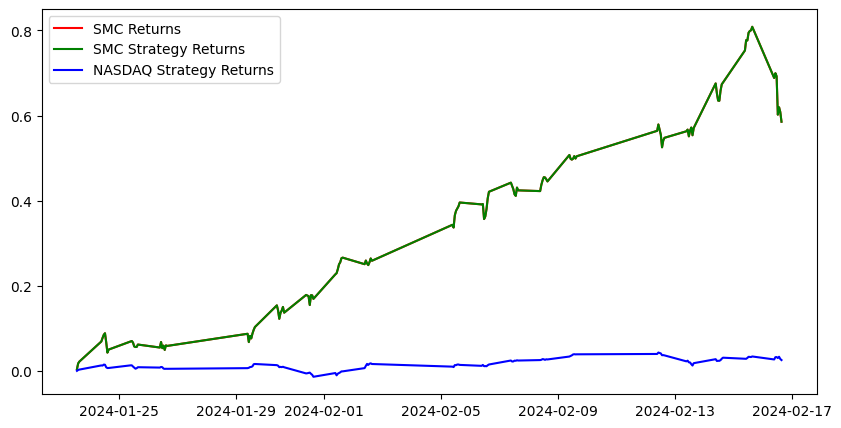

In [66]:
SMC_df['Predicted_Signal'] = model.predict(X)
SMC_df['SMC_returns'] = np.log(SMC_df['Close']/SMC_df['Close'].shift(1))
NASDAQ_df['ND_returns'] = np.log(NASDAQ_df['Close']/NASDAQ_df['Close'].shift(1))
NASDAQ_df['ND_Predicted_Signal'] = model.predict(X1)

Cumulative_SMC_returns = np.cumsum(SMC_df[split:]['SMC_returns'])
SMC_df['Startegy_returns'] = SMC_df['SMC_returns']* SMC_df['Predicted_Signal'].shift(1)
NASDAQ_df['ND_Startegy_returns'] = NASDAQ_df['ND_returns']* NASDAQ_df['ND_Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(SMC_df[split:]['Startegy_returns'])
Cumulative_NASDAQ_returns = np.cumsum(NASDAQ_df['Close']/NASDAQ_df['Close'].shift(1))
Cumulative_ND_Strategy_returns = np.cumsum(NASDAQ_df[split:]['ND_Startegy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_SMC_returns, color='r',label = 'SMC Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'SMC Strategy Returns')
plt.plot(Cumulative_ND_Strategy_returns, color='b', label = 'NASDAQ Strategy Returns')

plt.legend()
plt.show()


# **B) เพิ่ม feature (column) ต่างๆ ที่เราสนใจ จากนั้นให้ทำซ้ำตามข้อ (a.) แล้วแสดงผลลัพธ์ของกราฟเปรียบเทียบกับกราฟในข้อ a)**

# **เปรียบเทียบกับราคาขึ้นลงของทอง**

In [67]:
#COMEX
Gold = yf.Ticker('GC=F')
interval = '30m'
start = '2024-1-1'
end = '2024-2-20'
Gold_df = Gold.history(interval=interval,start=start,end=end)
Gold_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2024-01-02 00:00:00-05:00,2078.699951,2080.899902,2078.399902,2080.500000,1096,0.0,0.0
2024-01-02 00:30:00-05:00,2080.399902,2084.000000,2079.699951,2083.199951,3065,0.0,0.0
2024-01-02 01:00:00-05:00,2083.199951,2085.699951,2081.500000,2084.300049,2691,0.0,0.0
2024-01-02 01:30:00-05:00,2084.500000,2085.100098,2082.300049,2082.699951,2172,0.0,0.0
2024-01-02 02:00:00-05:00,2082.699951,2085.100098,2081.899902,2084.000000,3085,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-19 21:30:00-05:00,2029.400024,2029.400024,2028.199951,2028.599976,672,0.0,0.0
2024-02-19 22:00:00-05:00,2028.599976,2029.599976,2028.000000,2029.500000,887,0.0,0.0
2024-02-19 22:30:00-05:00,2029.500000,2029.800049,2029.000000,2029.400024,817,0.0,0.0


# **ข้อมูลจากข้อ a) ปรับช่วงเวลาให้ตรงกับช่วงราคาทอง (ย้อนหลังได้ 60 วัน)**

In [68]:
SMC1 = yf.Ticker('SMCI')
interval = '30m'
start = '2024-1-1'
end = '2024-2-20'
SMC1_df = SMC1.history(interval=interval,start=start,end=end)
SMC1_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2024-01-02 09:30:00-05:00,280.000000,282.997498,275.881287,280.989990,414930,0.0,0.0
2024-01-02 10:00:00-05:00,280.630096,282.865509,280.000092,281.750000,162468,0.0,0.0
2024-01-02 10:30:00-05:00,281.170013,283.940002,279.160004,282.429993,170496,0.0,0.0
2024-01-02 11:00:00-05:00,282.451385,285.649994,282.451385,284.829987,125802,0.0,0.0
2024-01-02 11:30:00-05:00,284.640015,286.980011,284.380005,286.045013,117583,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-16 13:30:00-05:00,816.500000,843.000000,812.159973,831.159973,1875515,0.0,0.0
2024-02-16 14:00:00-05:00,830.756592,842.000000,820.030029,830.856018,1338868,0.0,0.0
2024-02-16 14:30:00-05:00,830.090027,831.979919,802.320007,812.820007,1860918,0.0,0.0


In [69]:
#ค่า mean ของราคาหุ้นในช่วง 14 วัน
SMC1_df['S_14'] = SMC1_df['Close'].rolling(window=14).mean()
#Correlation ของราคาปิดในช่วง 14 วัน
SMC1_df['Corr'] = SMC1_df['Close'].rolling(window=14).corr(SMC1_df['S_14'])
#RSI ของหุ้นในช่วง 14 วัน Oversold (RSI<20) Overbought (RSI>80)
SMC1_df['RSI'] = ta.RSI(np.array(SMC1_df['Close']), timeperiod =14)
SMC1_df['Open-Close'] = SMC1_df['Open'] - SMC1_df['Close'].shift(1)
SMC1_df['Open-Open'] = SMC1_df['Open'] - SMC1_df['Open'].shift(1)
SMC1_df = SMC1_df.dropna()
X2 = SMC1_df.iloc[:,:9]
X2

,Open,High,Low,Close,Volume,Dividends,Stock Splits,S_14,Corr
Datetime,,,,,,,,,
2024-01-04 09:30:00-05:00,280.500000,282.170013,276.269989,277.758698,244169,0.0,0.0,282.591773,0.940634
2024-01-04 10:00:00-05:00,277.399994,286.500000,277.054901,286.334991,225758,0.0,0.0,282.778915,0.548534
2024-01-04 10:30:00-05:00,286.524994,287.989990,285.670013,286.549988,193604,0.0,0.0,282.942128,0.316518
2024-01-04 11:00:00-05:00,286.350006,292.390015,286.350006,291.429993,263405,0.0,0.0,283.539985,0.198373
2024-01-04 11:30:00-05:00,291.230011,292.570007,290.094910,290.779999,205824,0.0,0.0,283.936042,0.204586
...,...,...,...,...,...,...,...,...,...
2024-02-16 13:30:00-05:00,816.500000,843.000000,812.159973,831.159973,1875515,0.0,0.0,920.129434,0.317086
2024-02-16 14:00:00-05:00,830.756592,842.000000,820.030029,830.856018,1338868,0.0,0.0,908.976292,0.563041
2024-02-16 14:30:00-05:00,830.090027,831.979919,802.320007,812.820007,1860918,0.0,0.0,896.032719,0.714508


# **Add Column ราคาปิดของทอง**

In [70]:
SMC_df1 = X2

#Add Column Price Gold
SMC_df1['Price_Gold'] = Gold_df['Close']

X3 = SMC_df1
X3

,Open,High,Low,Close,Volume,Dividends,Stock Splits,S_14,Corr,Price_Gold
Datetime,,,,,,,,,,
2024-01-04 09:30:00-05:00,280.500000,282.170013,276.269989,277.758698,244169,0.0,0.0,282.591773,0.940634,2046.500000
2024-01-04 10:00:00-05:00,277.399994,286.500000,277.054901,286.334991,225758,0.0,0.0,282.778915,0.548534,2054.300049
2024-01-04 10:30:00-05:00,286.524994,287.989990,285.670013,286.549988,193604,0.0,0.0,282.942128,0.316518,2052.500000
2024-01-04 11:00:00-05:00,286.350006,292.390015,286.350006,291.429993,263405,0.0,0.0,283.539985,0.198373,2052.600098
2024-01-04 11:30:00-05:00,291.230011,292.570007,290.094910,290.779999,205824,0.0,0.0,283.936042,0.204586,2052.000000
...,...,...,...,...,...,...,...,...,...,...
2024-02-16 13:30:00-05:00,816.500000,843.000000,812.159973,831.159973,1875515,0.0,0.0,920.129434,0.317086,2025.599976
2024-02-16 14:00:00-05:00,830.756592,842.000000,820.030029,830.856018,1338868,0.0,0.0,908.976292,0.563041,2026.500000
2024-02-16 14:30:00-05:00,830.090027,831.979919,802.320007,812.820007,1860918,0.0,0.0,896.032719,0.714508,2024.400024


In [71]:
y3 = np.where(SMC_df1['Close'].shift(-1) > SMC_df1['Close'],1,-1)

split = int(0.7*len(SMC_df1))
X3_train, X3_test, y3_train, y3_test = X3[:split], X3[split:], y3[:split], y3[split:]

model = LogisticRegression()
model = model.fit (X3_train,y3_train)

pd.DataFrame(zip(X3.columns, np.transpose(model.coef_)))


,0,1
0,Open,[0.0005577606210821601]
1,High,[0.0005508567004646318]
2,Low,[0.0005611919112870887]
3,Close,[0.0005506094159994512]
4,Volume,[3.635059097987015e-08]
5,Dividends,[0.0]
6,Stock Splits,[0.0]
7,S_14,[0.0005076934309591071]
8,Corr,[2.330349994281514e-06]
9,Price_Gold,[-0.00036048856783510517]


In [72]:
prediction_date = '2024-02-22'
probability = model.predict_proba(X3_test)
print(probability)

[[0.25421561 0.74578439]
 [0.25428438 0.74571562]
 [0.25421097 0.74578903]
 [0.2458961  0.7541039 ]
 [0.229703   0.770297  ]
 [0.24661911 0.75338089]
 [0.24280569 0.75719431]
 [0.25108521 0.74891479]
 [0.25207479 0.74792521]
 [0.26004201 0.73995799]
 [0.26439373 0.73560627]
 [0.26294597 0.73705403]
 [0.25621295 0.74378705]
 [0.25577334 0.74422666]
 [0.24919911 0.75080089]
 [0.24615226 0.75384774]
 [0.24100449 0.75899551]
 [0.23475297 0.76524703]
 [0.23430877 0.76569123]
 [0.23756345 0.76243655]
 [0.24060218 0.75939782]
 [0.24033672 0.75966328]
 [0.24076957 0.75923043]
 [0.2431635  0.7568365 ]
 [0.24342837 0.75657163]
 [0.2467074  0.7532926 ]
 [0.245826   0.754174  ]
 [0.24094201 0.75905799]
 [0.23908866 0.76091134]
 [0.23867627 0.76132373]
 [0.23578722 0.76421278]
 [0.23984966 0.76015034]
 [0.23701434 0.76298566]
 [0.23741976 0.76258024]
 [0.23782104 0.76217896]
 [0.23587155 0.76412845]
 [0.23593233 0.76406767]
 [0.23399069 0.76600931]
 [0.22787458 0.77212542]
 [0.23154188 0.76845812]


In [73]:
predicted = model.predict(X3_test)
print(predicted)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]


In [74]:
print(metrics.confusion_matrix(y3_test, predicted))

[[ 0 52]
 [ 0 69]]


In [75]:
print(metrics.classification_report(y3_test, predicted))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        52
           1       0.57      1.00      0.73        69

    accuracy                           0.57       121
   macro avg       0.29      0.50      0.36       121
weighted avg       0.33      0.57      0.41       121



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
print(model.score(X3_test,y3_test))

0.5702479338842975


# **กราฟเปรียบเทียบกับกราฟในข้อ a)**

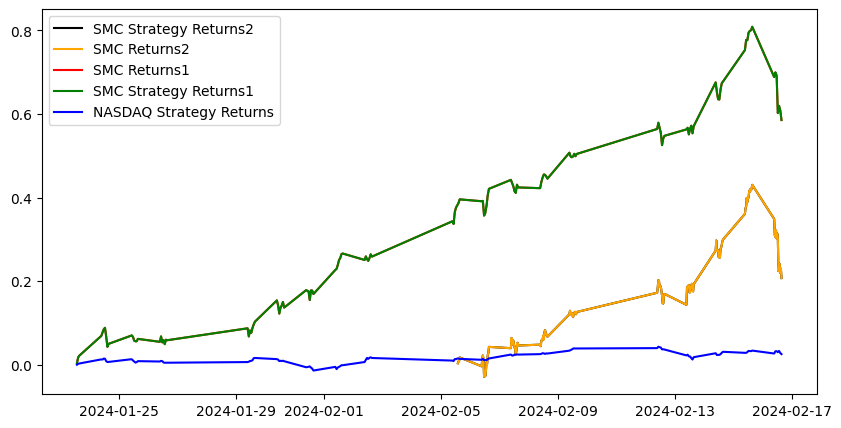

In [77]:
SMC_df1['Predicted_Signal2'] = model.predict(X3)
SMC_df1['SMC_returns2'] = np.log(SMC_df1['Close']/SMC_df1['Close'].shift(1))

Cumulative_SMC_returns_2 = np.cumsum(SMC_df1[split:]['SMC_returns2'])


SMC_df1['Strategy_returns2'] = SMC_df1['SMC_returns2']* SMC_df1['Predicted_Signal2'].shift(1)
Cumulative_Strategy_returns_2 = np.cumsum(SMC_df1[split:]['Strategy_returns2'])

# show result
plt.figure(figsize=(10,5))
plt.plot(Cumulative_Strategy_returns_2, color='black', label = 'SMC Strategy Returns2')
plt.plot(Cumulative_SMC_returns_2, color='orange', label = 'SMC Returns2')

plt.plot(Cumulative_SMC_returns, color='r',label = 'SMC Returns1')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'SMC Strategy Returns1')
plt.plot(Cumulative_ND_Strategy_returns, color='b', label = 'NASDAQ Strategy Returns')

plt.legend()
plt.show()